## CÁC HÀM LẤY DATA CỦA NEWS

In [1]:
from pyspark.sql import SparkSession
from bs4 import BeautifulSoup
import requests
from urllib.parse import urljoin
import os



spark = SparkSession.builder.master("local").appName("scrap").getOrCreate()
sc= spark.sparkContext

# trang bai bao to
def getBigLinks(url):  
    req = requests.get(url)
    
    soup = BeautifulSoup(req.content, "html.parser")

    li_tag =[]
    if url == 'https://vnexpress.net' :
        li_tag = soup.find_all("li", class_=["kinhdoanh", "batdongsan", "khoahoc", "giaitri", "thethao", "phapluat", "giaoduc", "suckhoe", "doisong", "dulich", "sohoa", "xe", "ykien"])  
        # li_tag = soup.find_all("li", class_=["thoisu","thegioi","kinhdoanh", "batdongsan", "khoahoc", "giaitri", "thethao", "phapluat", "giaoduc", "suckhoe", "doisong", "dulich", "sohoa", "xe", "ykien"])  
    elif url == 'https://vietnamnet.vn' :
        li_tag = soup.find_all('li', class_ =['mainNav__list-item swiper-slide'])
    elif url == 'https://tintuc.vn':
        li_tag = soup.find_all('li', class_ =[''])
    elif url == 'https://tinmoi.vn':
        li_tag = soup.find_all('li', class_ =['item_list_menu_main'])
    elif url == 'https://docnhanh.vn':
        li_tag = soup.find_all('li', class_ = ['xa-hoi', 'the-gioi', 'phap-luat', 'kinh-te', 'sao-360', 'giai-tri', 'the-thao', 'gioi-tre', 'o-to-xe-may', 'cong-nghe', 'loi-song', 'an-choi', 'phong-cach'])

    hrefList = []
    if li_tag:
      for li in li_tag:
        a_tag = li.find('a') 
        if a_tag:          
            href = a_tag.get("href")
            full_url = urljoin(url, href)
            hrefList.append(full_url) 

    if url == 'https://tintuc.vn':
        hrefList.pop()
        hrefList.pop()

    if url == 'https://tinmoi.vn':
        hrefList.pop(0)
    return hrefList



23/11/07 18:33:20 WARN Utils: Your hostname, group1-virtual-machine resolves to a loopback address: 127.0.1.1; using 192.168.188.131 instead (on interface ens33)
23/11/07 18:33:20 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/07 18:33:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# lay the loai trang bai bao to
def getGenreBigLink(url, hf):
    req = requests.get(url) 
    soup = BeautifulSoup(req.content, "html.parser")

    title = []
    if 'https://vnexpress.net' in url:
        title = soup.find_all("a", href=hf)
    elif 'https://tintuc.vn' in url:
        title = soup.find_all("a", href=url)
    elif 'https://tinmoi.vn'in url:
        title = soup.find_all("a", href=url)
    elif 'https://vietnamnet.vn/' in url:
        title = soup.find_all("a", href=hf)
    elif 'https://docnhanh.vn':
        title = soup.find("a", href=url)
        return title.get_text()
        
    
    
    if title:
        for t in title:
            if 'https://tinmoi.vn' not in url:
                return t.get("title")
            elif 'https://tinmoi.vn' in url:
                return t.get_text()



In [3]:
from urllib.parse import urlparse

def getSmallLink(url):
    req = requests.get(url)
    
    soup = BeautifulSoup(req.content, "html.parser")

    ul_tag = []
    div = []
    if 'vnexpress.net' in url:
        ul_tag = soup.find_all("ul", class_ = ["ul-nav-folder"])
    elif 'vietnamnet.vn' in url:
        ul_tag = soup.find_all("ul", class_ = 'swiper-wrapper')
        ul_tag = [ul_tag[1]]
    elif 'https://tintuc.vn' in url:
        ul_tag = soup.find_all("ul", class_ = 'nav sub-nav')
    elif 'https://tinmoi.vn' in url:
        div = soup.find_all("div", class_ = 'list-tags')
    elif "https://docnhanh.vn" in url:
        return [url]

    hrefList = []
    if 'https://tinmoi.vn' in url:
        if div:
            for d in div:
                h3 = d.find_all('h3')
                if h3:
                    for h in h3:
                        a_tag = h.find('a')
                        if a_tag:
                            href = a_tag.get('href')
                            hrefList.append(href)
        return hrefList   
    else:
        if ul_tag:
          for ul in ul_tag:
            li_tag = ul.find_all('li') 
            if li_tag:
                for li in li_tag:
                    a_tag = li.find('a')
                    if a_tag:
                        href = a_tag.get('href')
                        
                        parsed_url = urlparse(url)
                        scheme = parsed_url.scheme
                        netloc = parsed_url.netloc
                        base_url = f"{scheme}://{netloc}"
                        full_url = urljoin(base_url, href)
                        hrefList.append(full_url)                         
        return hrefList



In [4]:
def getGenreSmallLink(url, href):
    req = requests.get(url)
    
    soup = BeautifulSoup(req.content, "html.parser")

    title= []
    if 'https://vnexpress.net' in url:
        title = soup.find_all("a", href=href)
    elif 'https://tintuc.vn' in url:
        title = soup.find_all("a", href=url)
    elif 'https://tinmoi.vn' in url:
        title = soup.find_all("a", href=url)
    elif 'https://vietnamnet.vn/' in url:
        title = soup.find_all("a", href=href)
    elif 'https://docnhanh.vn' in url:
        return "Unknow"
    
    if title:
        for t in title:
            if t:
                if 'https://tinmoi.vn' in url:
                    return t.get_text()
                else:
                    return t.get("title")



In [5]:
def getAuthor(url):
    req = requests.get(url)
    
    soup = BeautifulSoup(req.content, "html.parser")

    if 'https://vnexpress.net' in url:
        pTagList = soup.find_all("p", class_="Normal")
        pTagList_AuthorMail = soup.find_all('p' , class_="author_mail")
        divTagList_textAlign = soup.find_all('div' ,  style='text-align:right')
        pTagList_textAlign = soup.find_all('p' ,  style='text-align:right;')
        pTagList_author= soup.find_all('p' ,  class_='author')
        pTagList_credit = soup.find_all('p' ,  class_='credit')
        pRight = soup.find('p' ,  align='right')

        if pRight:
            b = pRight.find('b')
            if b:
                return b.text
    
        if pTagList_author:
            for p in pTagList_author:
                strongTag = p.find('strong')
                if strongTag:
                    return strongTag.text
    
        if divTagList_textAlign:
            for p in divTagList_textAlign:
                strongTag = p.find('strong')
                if strongTag:
                    return strongTag.text

        if pTagList_textAlign:
            for p in pTagList_textAlign:
                strongTag = p.find('strong')
                if strongTag:
                    return strongTag.text

        if pTagList_credit:
            for p in pTagList_credit:
                if p:
                    return p.get_text()
    
        if pTagList_AuthorMail:
            for p in pTagList_AuthorMail:
                strongTag = p.find('strong')
                if strongTag:
                    return strongTag.text
            
        if pTagList:
            for p in pTagList:
                strongTag = p.find('strong')
                if strongTag:
                    return strongTag.text

    elif 'https://vietnamnet.vn' in url:
        span = soup.find("span", class_="name")
        div = soup.find_all("div", class_="name")
        div_strong = soup.find_all('div', class_='maincontent main-content')
        if span:
            atag = span.find('a')
            if atag:   
                return atag.get('title')
        if div:
            for d in div:
                atag = d.find('a')
                if atag:   
                    return atag.get('title')
        if div_strong:
            for d in div_strong:
                pList = d.find_all('p')
                if pList:
                    for p in pList:
                        strong  = p.find('strong')
                        if strong:
                            return strong.get_text()
    elif 'https://tintuc.vn' in url:
        span = soup.find("span", class_="article-writer")
        if span:
            strong = span.find('strong')
            if strong:   
                return strong.text
    elif 'https://tinmoi.vn' in url:
        div = soup.find("div", class_="footer-content text-right mb10")
        if div:
            p = div.find('p')
            if p:
                strong = p.find('strong')
                if strong:
                    return strong.get_text()
    elif 'https://docnhanh.vn' in url:
        p = soup.find('p', style='text-align: right;')
        if p:
            strong = p.find('strong')
            if strong:
                return strong.get_text()


In [6]:
def getNameOfNewsPage(url):
    req = requests.get(url)
    
    soup = BeautifulSoup(req.content, "html.parser")
    name =  soup.title.string
    if name:
        return name



In [1]:
from pyspark.sql import SparkSession
from bs4 import BeautifulSoup
import requests

spark = SparkSession.builder.master("local").appName("keyword_count").getOrCreate()
sc= spark.sparkContext

# lay href cua tung tieu de bai bao
def scrape_websites_getLink(url):    
    req = requests.get(url)
    
    soup = BeautifulSoup(req.content, "html.parser")

    if 'https://vnexpress.net' in url:   
        h3_tag = soup.find_all("h3", class_="title-news")
        h1_tag = soup.find_all("h1", class_="title-news")
        h2_tag = soup.find_all("h2", class_="title-news")
        
        hrefList = []
        if h1_tag:
          for h1 in h1_tag:
            a_tag = h1.find('a') 
            if a_tag:
                href = a_tag.get("href")
                hrefList.append(href) 
        
        if h2_tag:
          for h2 in h2_tag:
            a_tag = h2.find('a') 
            if a_tag:
                href = a_tag.get("href")
                hrefList.append(href) 
                
        if h3_tag:
          for h3 in h3_tag:
            a_tag = h3.find('a') 
            if a_tag:
                href = a_tag.get("href")
                hrefList.append(href) 
                
        to_remove = "https://video.vnexpress.net/"
        filtered_hrefList = [href for href in hrefList if not href.startswith(to_remove)]
        valid_urls = [url for url in filtered_hrefList if url]
        return valid_urls

    elif 'https://vietnamnet.vn' in url:
        h3_tag = soup.find_all("h3", class_="verticalPost__main-title vnn-title title-bold")
        h1_tag = soup.find_all("h1", class_="verticalPost__main-title vnn-title title-bold")
        h2_tag = soup.find_all("h2", class_="verticalPost__main-title vnn-title title-bold")

        h3_tag_2 = soup.find_all("h3", class_="horizontalPost__main-title vnn-title title-bold")
        h1_tag_2 = soup.find_all("h1", class_="horizontalPost__main-title vnn-title title-bold")
        h2_tag_2 = soup.find_all("h2", class_="horizontalPost__main-title vnn-title title-bold")
        
        hrefList = []
        if h1_tag:
          for h1 in h1_tag:
            a_tag = h1.find('a') 
            if a_tag:
                href = a_tag.get("href")
                hrefList.append(href) 
        
        if h2_tag:
          for h2 in h2_tag:
            a_tag = h2.find('a') 
            if a_tag:
                href = a_tag.get("href")
                hrefList.append(href) 
                
        if h3_tag:
            for h3 in h3_tag:
                a_tag = h3.find('a') 
                if a_tag:
                    href = a_tag.get("href")
                    hrefList.append(href) 

        if h1_tag_2:
          for h1 in h1_tag_2:
            a_tag = h1.find('a') 
            if a_tag:
                href = a_tag.get("href")
                hrefList.append(href) 
        
        if h2_tag_2:
          for h2 in h2_tag_2:
            a_tag = h2.find('a') 
            if a_tag:
                href = a_tag.get("href")
                hrefList.append(href) 
                
        if h3_tag_2:
            for h3 in h3_tag_2:
                a_tag = h3.find('a') 
                if a_tag:
                    href = a_tag.get("href")
                    hrefList.append(href) 
                    
        newHrefList = []
        if hrefList:
            for href in hrefList:
                if 'https://vietnamnet.vn' not in href:
                    parsed_url = urlparse(url)
                    scheme = parsed_url.scheme
                    netloc = parsed_url.netloc
                    base_url = f"{scheme}://{netloc}"
                    full_url = urljoin(base_url, href)
                    newHrefList.append(full_url)  
                else:
                    newHrefList.append(href)

        valid_urls = [url for url in newHrefList if url]
        return valid_urls
    elif 'https://tintuc.vn' in url:
        h3_tag = soup.find_all("h3", class_="heading")
        h1_tag = soup.find_all("h1", class_="heading")
        h2_tag = soup.find_all("h2", class_="heading")

        
        
        hrefList = []
        if h1_tag:
          for h1 in h1_tag:
            a_tag = h1.find('a') 
            if a_tag:
                href = a_tag.get("href")
                hrefList.append(href) 
        
        if h2_tag:
          for h2 in h2_tag:
            a_tag = h2.find('a') 
            if a_tag:
                href = a_tag.get("href")
                hrefList.append(href) 
                
        if h3_tag:
            for h3 in h3_tag:
                a_tag = h3.find('a') 
                if a_tag:
                    href = a_tag.get("href")
                    hrefList.append(href) 

        valid_urls = [url for url in hrefList if url]
        return valid_urls
    elif 'https://tinmoi.vn' in url:
        div_1 = soup.find_all("div", class_="col50per")
        div_2 = soup.find_all("div", class_="col30per mt20")
    
        hrefList = []
                
        if div_1:
            for d in div_1:
                a_tag = d.find('a') 
                if a_tag:
                    href = a_tag.get("href")
                    hrefList.append(href) 

        if div_2:
            for d in div_2:
                a_tag = d.find('a') 
                if a_tag:
                    href = a_tag.get("href")
                    hrefList.append(href) 
        url_to_remove = ['https://tinmoi.vn/tien-nhieu-de-lam-gi-de-mang-doi-giay-made-in-thuong-dinh-nhu-dai-gia-dang-le-nguyen-vu-011512009.html','https://tinmoi.vn/dinh-han-nang-cuoi-nam-2-con-giap-nay-vua-pham-tam-tai-lai-them-thai-tue-d307-011625620.html','https://tinmoi.vn/thiet-ke-ban-tho-lot-top-18-trang-phuc-dan-toc-cho-hoang-thuy-thi-miss-universe-011524219.html','https://tinmoi.vn/ngam-than-hinh-chuan-nhu-sieu-mau-cua-ntk-goc-viet-trisha-vu-011516313.html']
        for url in url_to_remove:
            if url in hrefList:
                hrefList.remove(url)
        valid_urls = [url for url in hrefList if url]
        return valid_urls
    elif 'https://docnhanh.vn' in url:
        divTop = soup.find_all('div', class_= 'category_news_top')
        divList = soup.find_all('div', class_= 'category_news_list')

        hrefList =[]
        if divTop:
            for d in divTop:
                ul = d.find('ul')
                if ul:
                    liList = ul.find_all('li')
                    if liList:
                        for li in liList:
                            a = li.find('a')
                            if a:
                                hrefList.append(a.get("href"))
        if divList:
            for d in divList:
                ul = d.find('ul')
                if ul:
                    liList = ul.find_all('li')
                    if liList:
                        for li in liList:
                            a = li.find('a')
                            if a:
                                hrefList.append(a.get("href"))
        valid_urls = [url for url in hrefList if url]
        return valid_urls



23/11/07 20:49:34 WARN Utils: Your hostname, group1-virtual-machine resolves to a loopback address: 127.0.1.1; using 192.168.188.131 instead (on interface ens33)
23/11/07 20:49:34 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/07 20:49:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/11/07 20:49:48 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [8]:
from newspaper import Article
from textblob import TextBlob


# lay data trong 1 bai bao nho
def get_content(url):
    article = Article(url, language='vi')
    article.download()
    article.parse()
    return article.text
       


In [9]:
# from pyspark.sql import SparkSession
# from bs4 import BeautifulSoup
# import requests


# # lay data trong 1 bai bao nho
# def get_content(url):
#     req = requests.get(url)
    
#     soup = BeautifulSoup(req.content, "html.parser")

#     if 'https://vnexpress.net' in url:
#         textList = []
        
#         pTagList = soup.find_all("p", class_="Normal")
        
#         pDescription = soup.find_all("p", class_="description")
#         for p_ in pDescription:       
#             textList.append(p_.text)
        
#         for pTag in pTagList:
#             text = pTag.get_text()
#             textList.append(text)
        
#         if not textList:
#             return ""
        
#         allTest = "\n".join(textList)
#         return allTest
#     elif 'https://vietnamnet.vn' in url:
#         textList = []

#         div = soup.find_all("div", class_="maincontent main-content")
#         h2_tag = soup.find_all("h", class_="content-detail-sapo sm-sapo-mb-0")
#         ptext = []
        
#         for d in div:       
#             pList = d.find_all('p')
#             if pList:
#                 for p in pList:
#                     ptext.append(p.get_text())
        
        
#         if not ptext:
#             return ""
        
#         allTest = "\n".join(ptext)
#         return allTest
#     elif 'https://tintuc.vn' in url:
#         textList = []

#         pList = soup.find_all("p", class_="article-sapo")
#         divs = soup.find_all("div", class_="content_article")
#         ptext = []
        
#         for p in pList:       
#             if p:
#                 ptext.append(p.get_text())

#         for div in divs:
#             p = div.find_all('p')
#             if p:
#                 for data in p:
#                     ptext.append(data.get_text())
        
#         if not ptext:
#             return ""
        
#         allTest = "\n".join(ptext)
#         return allTest
#     elif 'https://tinmoi.vn' in url:
#         textList = []

#         h2 = soup.find("h2", class_="article_sapo mt10 text-justify")
#         if h2:
#             textList.append(h2.get_text())
        
#         divs = soup.find_all("div", class_="content-detail text-justify")
#         if divs:
#             for div in divs:
#                 h2_diffirent = div.find('h2')
#                 if h2_diffirent:
#                     strong = h2_diffirent.find('strong')
#                     if strong:
#                         textList.append(strong.get_text())
#                 pList = div.find_all('p')
#                 if pList:
#                     for p in pList:
#                         textList.append(p.get_text())
                
#         cleaned_list = []
#         for s in textList:
#             if s.strip():  
#                 cleaned_string = s.replace('\xa0', '')
#                 cleaned_list.append(cleaned_string)    
#         allTest = "\n".join(cleaned_string)
#         return allTest                
        
       


In [10]:
# lay title cua mot bai bao nho
def get_title(url):
  req = requests.get(url)

  soup = BeautifulSoup(req.content, "html.parser")

  title = soup.find('title')
  if title:
      return title.text




## LƯU CÁC DỮ LIỆU BÀI BÁO THEO THỜI GIAN THỰC

In [ ]:
import psycopg2 as p
import psycopg2.extras as pe
import os

hostname = '127.0.0.1'
database = 'news_page_keywords'
username = 'postgres'
password = 'test123456'
port = 5432
conn = None

while True:
    try:
        with p.connect(host = hostname, dbname = database, user = username, password = password, port = port ) as conn:
            with conn.cursor(cursor_factory = pe.DictCursor) as cur:

                # truy cap vao tung url 
                urls = ["https://vnexpress.net", 'https://vietnamnet.vn', 'https://tintuc.vn', 'https://tinmoi.vn', 'https://docnhanh.vn']
                # urls = ['https://docnhanh.vn']
                for url in urls:
                    # thuoc tinh trong csdl
                    nameOfNewsPage = getNameOfNewsPage(url)
                    
                    bigLinks =  getBigLinks(url)
                    
                    for base_url in bigLinks :
                        hf = '/'+base_url.split("/")[-1]
                        
                        # thuoc tinh trong csdl
                        bigGenre = getGenreBigLink(base_url, hf)

                        print('**********************************************************************************')
                        print(f"Đã quét tới trang {bigGenre}  của trang {nameOfNewsPage}") 
                        print('**********************************************************************************\n')
        
                        smallLink = getSmallLink(base_url)
                        if not smallLink :
                            smallLink.append(base_url)
                        
                        for slink in smallLink :
    
                            url_parts = slink.split(url)
                            href = url_parts[-1]
                            # thuoc tinh trong csdl
                            smallGenre = getGenreSmallLink(slink, href)
                            
                            for i in range(1, 21):
                                u= ''
                                if url == "https://vnexpress.net":
                                    u = f"{slink}-p{i}"
                                elif url == "https://vietnamnet.vn":
                                    u = f"{slink}-page{i-1}"
                                elif url == "https://tintuc.vn":
                                    u = f"{slink}?page={i}"  
                                elif url == 'https://tinmoi.vn':
                                    u = f"{slink}/page/{i}"  
                                elif url == 'https://docnhanh.vn':
                                    u= f"{slink}/p{i}"

                         
                                getLinks = scrape_websites_getLink(u) 

                                if not getLinks:
                                    break

                                if url == 'https://vietnamnet.vn':
                                    print('**********************************************************************************')
                                    print(f"Đã quét tới trang {i-1} của bài báo {smallGenre} của trang  {nameOfNewsPage}")
                                    print('**********************************************************************************\n')
                                else:
                                    print('**********************************************************************************')
                                    print(f"Đã quét tới trang {i} của bài báo {smallGenre} của trang  {nameOfNewsPage}")
                                    print('**********************************************************************************\n')
              
                    
                                # cho nay phai de xuong duoi 
                                if len(getLinks) >0:
                                    placeholders = ', '.join(['%s'] * len(getLinks))
                                                    
                                    cur.execute(f'SELECT source FROM news WHERE source IN ({placeholders})', getLinks)
                                    news = cur.fetchall()
                                    num_rows_selected = cur.rowcount
                               
    
                
                                if len(getLinks) != num_rows_selected:
                                    source_in_db = []
                                    for data in news:
                                        source_in_db.append(data['source'])
                                
                                    # Sử dụng list comprehension để tạo mảng chứa các phần tử không trùng nhau
                                    result = [x for x in getLinks if x not in source_in_db]
                                    result = list(set(result))
    
                                    item = []
                                    # insert vao bang news
                                    for link in result:  
                                        item.append((get_title(link),  getAuthor(link),get_content(link), bigGenre, smallGenre,nameOfNewsPage ,link))
                                 
    
                                    insert_script_news = '''INSERT INTO news 
                                                        (title,author ,content,bigGenre ,smallGenre, nameOfNewsPage ,source)
                                                       VALUES (%s, %s, %s, %s, %s, %s ,%s)'''
                                    # records = (title, author, content, bigGenre, smallGenre, nameOfNewsPage, links)
                                    cur.executemany(insert_script_news, item)
    
                              
                                    conn.commit()
                                
    except Exception as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
            
        
            
            


## VẼ BIỂU ĐỒ TỈ LỆ CÁC BÀI BÁO THEO THỂ LOẠI LỚN

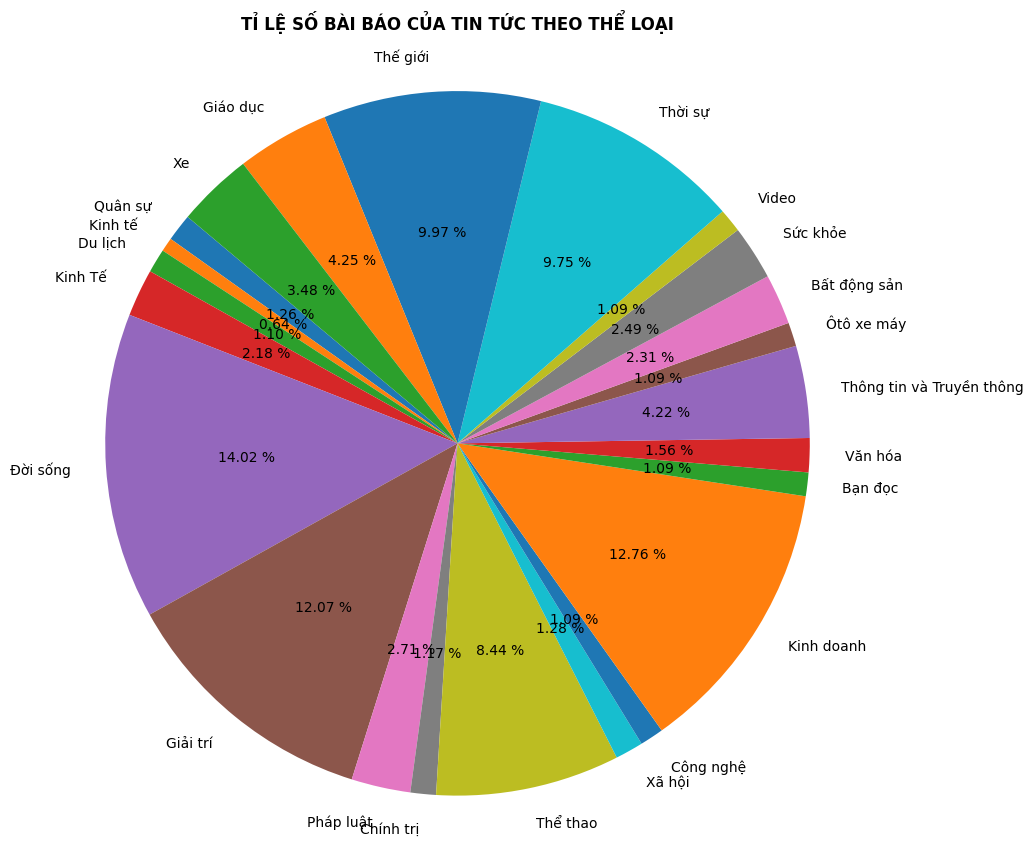

In [2]:
import matplotlib.pyplot as plt
import psycopg2 as p
import psycopg2.extras as pe
import time
import os
import pandas as pd
import matplotlib.pyplot as plt

hostname = '127.0.0.1'
database = 'news_page_keywords'
username = 'postgres'
password = 'test123456'
port = 5432
conn = None


try:
    with p.connect(host = hostname, dbname = database, user = username, password = password, port = port ) as conn:
        with conn.cursor(cursor_factory = pe.DictCursor) as cur:
            
            script = '''SELECT bigGenre,COUNT(bigGenre) FROM news GROUP BY bigGenre '''
            cur.execute(script)

            result = []
            for data in cur.fetchall():
                result.append((data[0], data[1]))
                
            
            if result:
                labels = [item[0] for item in result]
                sizes =  [item[1] for item in result]
                
                plt.figure(figsize=(10, 10))
                
                # Tạo biểu đồ tròn
                plt.pie(sizes, labels=labels, autopct='%.2f %%', startangle=140)
                plt.axis('equal')  # Đảm bảo biểu đồ tròn là hình tròn
                plt.title('TỈ LỆ SỐ BÀI BÁO CỦA TIN TỨC THEO THỂ LOẠI\n', fontweight="bold") 
                
                
                # Hiển thị biểu đồ
                plt.show()
except Exception as error:
    print(error)
finally:
    if conn is not None:
        conn.close()

        
        


## TOP 5 THỂ LOẠI NHỎ TRONG TIN TỨC

23/11/07 13:59:54 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


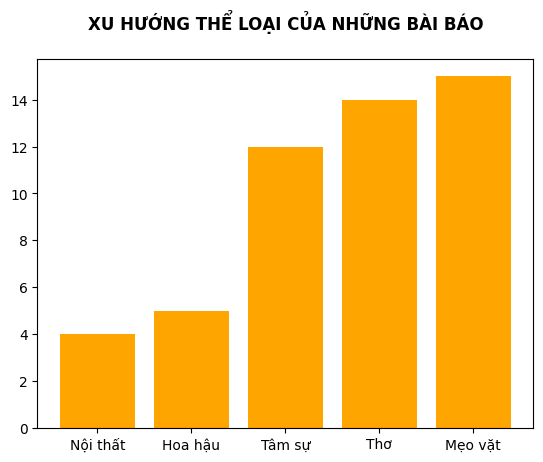

In [11]:
import psycopg2 as p
import psycopg2.extras as pe
import time
import os
import pandas as pd
import matplotlib.pyplot as plt

hostname = '127.0.0.1'
database = 'news_page_keywords'
username = 'postgres'
password = 'test123456'
port = 5432
conn = None


try:
    with p.connect(host = hostname, dbname = database, user = username, password = password, port = port ) as conn:
        with conn.cursor(cursor_factory = pe.DictCursor) as cur:
            
            script = '''SELECT smallgenre,COUNT(smallgenre) FROM news GROUP BY smallgenre ORDER BY COUNT(smallgenre) LIMIT 5 '''
            cur.execute(script)

            result = []
            for data in cur.fetchall():
                result.append((data[0], data[1]))
                
            
            if result:
                smallGenre = [item[0] for item in result]
                count =  [item[1] for item in result]
                
                # plt.figure(figsize=(10, 10))
                
                # Tạo biểu đồ tròn
                plt.bar(smallGenre, count, color = 'orange')
                plt.title('XU HƯỚNG THỂ LOẠI CỦA NHỮNG BÀI BÁO\n', fontweight="bold") 
                
                
                # Hiển thị biểu đồ
                plt.show()
except Exception as error:
    print(error)
finally:
    if conn is not None:
        conn.close()

        
        


## TÓM TẮT NỘI DUNG CỦA 1 BÀI BÁO

In [12]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest
import nltk
import psycopg2 as p
import psycopg2.extras as pe

def textSummarizer(text, percentage): 
    # load the model into spaCy
    nlp = spacy.load("vi_core_news_lg")
    
    # pass the text into the nlp function
    doc= nlp(text)
    
    ## tokens chua tat ca cac tu va freq la dung` de dem so lan xuat hien
    tokens=[token.text for token in doc]
    freq_of_word=dict()
    
    # Text cleaning and vectorization 
    for word in doc:
        if word.text.lower() not in list(STOP_WORDS):
            if word.text.lower() not in punctuation:
                if word.text not in freq_of_word.keys():
                    freq_of_word[word.text] = 1
                else:
                    freq_of_word[word.text] += 1
                    
    # tan suat xuat hien cao nhat
    max_freq=max(freq_of_word.values())
    
    # chuan hoa tan so tu`
    for word in freq_of_word.keys():
        freq_of_word[word]=freq_of_word[word]/max_freq
        
    # GAN' TAN SUAT XUAT HIEN TRONG VAN BAN HIEN TAI
    sent_tokens= [sent for sent in doc.sents]
    sent_scores = dict()
    for sent in sent_tokens:
        for word in sent:
            if word.text.lower() in freq_of_word.keys():
                if sent not in sent_scores.keys():                            
                    sent_scores[sent]=freq_of_word[word.text.lower()]
                else:
                    sent_scores[sent]+=freq_of_word[word.text.lower()]
    
    # tinh so luong cau de tom tat
    len_tokens=int(len(sent_tokens)*percentage)
    
    # lua chon cau co tan xuat xuat hien cao nhat de tom tat bang ham` nlargest
    summary = nlargest(n = len_tokens, iterable = sent_scores,key=sent_scores.get)
    
    # lay ra tung tu sau khi tom tat
    final_summary=[word.text for word in summary]

    summary=" ".join(final_summary)


    # Return final summary
    return summary


hostname = '127.0.0.1'
database = 'news_page_keywords'
username = 'postgres'
password = 'test123456'
port = 5432
conn = None
nltk.download('punkt')

try:
    with p.connect(host = hostname, dbname = database, user = username, password = password, port = port ) as conn:
        with conn.cursor(cursor_factory = pe.DictCursor) as cur:

            url = 'https://vnexpress.net/dai-bieu-quoc-hoi-dinh-gia-dat-theo-phuong-phap-thang-du-kho-kha-thi-4672598.html'
            script = '''SELECT title, content FROM news WHERE source = %s'''
            cur.execute(script, (url,))
            result = cur.fetchone()
            title = result['title']
            content = result['content']

            print(f"title : {title}\n")

            print(f"content chưa được tóm tắt :\n{content}\n")

            print(f"content được tóm tắt:\n{textSummarizer(content, 0.2)}")
            
except Exception as error:
    print(error)
finally:
    if conn is not None:
        conn.close()

        
        


2023-11-07 14:00:48.715754: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 14:00:49.120360: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 14:00:49.120450: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 14:00:49.124547: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-07 14:00:49.355234: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 14:00:49.361901: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

title : Đại biểu Quốc hội: Định giá đất theo phương pháp thặng dư khó khả thi - VnExpress Kinh doanh

content chưa được tóm tắt :
Xác định giá đất theo phương pháp thặng dư thường cho sai số lớn, thiếu chính xác và khó khả thi, nên đại biểu Quốc hội đề nghị bỏ cách này.
Một trong những mục tiêu khi sửa Luật Đất đai là định giá đất sát thị trường. Do đó, sau giải trình, tiếp thu, dự thảo luật trình Quốc hội tại kỳ họp 6 đưa ra các phương pháp định giá đất, gồm so sánh, thu nhập, thặng dư và hệ số điều chỉnh giá đất.
Tuy nhiên, ông Vũ Hồng Thanh, Chủ nhiệm Ủy ban Kinh tế, cho biết do còn nhiều ý kiến khác nhau nên dự thảo luật đưa ra hai phương án định giá đất. Phương án 1, là quy định tại luật về nội dung 4 phương pháp định giá đất, và giao Chính phủ xác định trường hợp, điều kiện áp dụng. Chính phủ đề xuất thực hiện theo hướng này.
Phương án 2, luật nêu nội dung phương pháp định giá đất và trường hợp, điều kiện áp dụng từng phương pháp. Đa số ý kiến của Ủy ban Thường vụ Quốc hội thống 

## GÁN NHÃN VÀ TÌM KIẾM TÊN RIÊNG

In [3]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest
import nltk
import matplotlib.pyplot as plt
import psycopg2 as p
import psycopg2.extras as pe
from underthesea import pos_tag


hostname = '127.0.0.1'
database = 'news_page_keywords'
username = 'postgres'
password = 'test123456'
port = 5432
conn = None
nltk.download('punkt')



try:
    with p.connect(host = hostname, dbname = database, user = username, password = password, port = port ) as conn:
        with conn.cursor(cursor_factory = pe.DictCursor) as cur:

            url = 'https://vietnamnet.vn/mbappe-duoc-doan-gianh-6-qua-bong-vang-hlv-psg-mach-nuoc-hoc-tro-2210565.html'
            script = '''SELECT content FROM news WHERE source = %s'''
            cur.execute(script, (url,))
            result = cur.fetchone()[0]
            print(result)

            print('\n\n')
            
            print(pos_tag(result))

            print('\n\n')
            
            # Sử dụng list comprehension để lọc các cặp từ có nhãn 'Np'
            np_words = [word for word, tag in pos_tag(result) if tag == 'Np']      

            np_words = list(set(np_words))
            print(np_words)
            
            
except Exception as error:
    print(error)
finally:
    if conn is not None:
        conn.close()

        
        


2023-11-07 21:03:32.605016: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 21:03:33.244199: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 21:03:33.244275: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 21:03:33.247715: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-07 21:03:33.556774: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 21:03:33.565676: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Sự thống trị Quả bóng vàng của Lionel Messi và Cristiano Ronaldo đã kết thúc trong năm nay, sau khi siêu sao Argentina lần thứ 8 được tôn vinh và cả 2 hiện đã chơi bóng ngoài châu Âu.
Nếu Messi sang Mỹ chơi bóng, gia nhập Inter Miami của cựu danh thủ MU, David Beckham thì Ronaldo hiện ở Saudi Pro Leauge, trong màu áo Al Nassr.
Những cái tên về nhì và thứ 3 ở lễ trao giải vừa qua là Haaland và Mbappe cùng Cậu bé vàng Jude Bellingham,… được xem sẽ là thế hệ tiếp theo để tranh đua giải thưởng cá nhân cao quý này.
Và Football Manager 2024 đã dùng hệ thống để mô phỏng tương lai, dự đoán người chiến thắng Quả bóng vàng trong thập kỷ tới.
Vậy ai sẽ là người giành nhiều danh hiệu này nhất? FM24 đã cho Mbappe 6 lần được xướng tên danh hiệu Quả bóng vàng vào các năm 2024, 2025, 2026, 2027, 2030 và 2031. Xen giữa chân sút tuyển Pháp sẽ là Haaland, Bellingham, Lamine Yaman và Vinicius.
Dù đó chỉ là dự đoán nhưng ai cũng thấy được việc Kylian Mbappe giành Quả bóng vàng chỉ là vấn đề thời gian. HLV 

## VẼ BIỂU ĐỒ TOP 10 TÊN RIÊNG XUẤT HIỆN NHIỀU NHẤT

In [13]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest
import nltk
import matplotlib.pyplot as plt
import psycopg2 as p
import psycopg2.extras as pe
from underthesea import pos_tag


hostname = '127.0.0.1'
database = 'news_page_keywords'
username = 'postgres'
password = 'test123456'
port = 5432
conn = None
nltk.download('punkt')



try:
    with p.connect(host = hostname, dbname = database, user = username, password = password, port = port ) as conn:
        with conn.cursor(cursor_factory = pe.DictCursor) as cur:

            script = '''SELECT title FROM news'''
            cur.execute(script)
            result = cur.fetchall()

            npList =[]
            npCount ={}
            if result:
                for r in result:
                    posTag = pos_tag(r[0])
                    if posTag:
                        for word, tag in posTag:
                            if tag == 'Np':
                                npList.append(word)
                                npList = list(set(npList))

   
            for np in npList:
                if np in npCount:
                    npCount[np] +=1
                else :
                    npCount[np] =1

            sorted_items = sorted(npCount.items(), key=lambda x: x[1], reverse=True)
            sorted_dict = dict(sorted_items)
            top_10 = list(sorted_dict.items())[:10]
            print(top_10)
except Exception as error:
    print(error)
finally:
    if conn is not None:
        conn.close()

        
        


[nltk_data] Downloading package punkt to /home/group1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('Đầm', 1), ('Wind Media', 1), ('Ba Huân', 1), ('Khaleej', 1), ('Marine One', 1), ('Cát Linh', 1), ('BĐS TP.HCM', 1), ('Lén', 1), ('Ancelotti', 1), ('Century SUV', 1)]


## GENRE PREDICTION (Multinomial Naive Bayes) 

In [63]:
import matplotlib.pyplot as plt
import psycopg2 as p
import psycopg2.extras as pe
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


hostname = '127.0.0.1'
database = 'news_page_keywords'
username = 'postgres'
password = 'test123456'
port = 5432
conn = None



try:
    with p.connect(host = hostname, dbname = database, user = username, password = password, port = port ) as conn:
        with conn.cursor(cursor_factory = pe.DictCursor) as cur:

            

            script = '''SELECT title,smallgenre FROM news'''
            cur.execute(script)
            result = cur.fetchall()

            X = []
            Y = []
            for data in result:
                Y.append(data['smallgenre'])
                X.append(data['title'])

            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

            # Tạo và huấn luyện mô hình
            # lay ra 5000 tu pho bien nhat
            tfidf_vectorizer = TfidfVectorizer(max_features=5000)
            # bien dien duoi dang vector
            X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
            # mo hinh may hoc loai Naive Bayes, thich hop cho bai toan phan loai van phan
            clf = MultinomialNB()
            # huan luyen mo hinh X_train_tfidf va theo loai cua no la y_train
            clf.fit(X_train_tfidf, y_train)

            # Dự đoán thể loại cho tiêu đề mới
            def predict_category(new_title):
                new_title_tfidf = tfidf_vectorizer.transform([new_title])
                predicted_category = clf.predict(new_title_tfidf)
                return predicted_category[0]

            # Dự đoán thể loại cho tập dữ liệu kiểm tra
            X_test_tfidf = tfidf_vectorizer.transform(X_test)
            y_pred = clf.predict(X_test_tfidf)
            
            # Tính độ chính xác
            accuracy = accuracy_score(y_test, y_pred)
            print(f'Độ chính xác trên tập kiểm tra: {accuracy * 100:.2f}%')

except Exception as error:
    print(error)
finally:
    if conn is not None:
        conn.close()

        
        
# Dùng hàm predict_category để dự đoán thể loại cho tiêu đề mới
new_title = "Smartphone vivo V29 series 5G ra mắt, giá từ 9 triệu đồng"
predicted_category = predict_category(new_title)
print(f'Thể loại dự đoán cho tiêu đề "{new_title}" là: {predicted_category}')

Độ chính xác trên tập kiểm tra: 61.52%
Thể loại dự đoán cho tiêu đề "Smartphone vivo V29 series 5G ra mắt, giá từ 9 triệu đồng" là: Thị trường


## FAKE NEWS PREDICTION LinearSVC

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC


In [18]:
data = pd.read_csv("/home/group1/Downloads/vn_news_226_tlfr.csv")

In [19]:
data

,text,label
0,Thủ tướng Abe cúi đầu xin lỗi vì hành động phi...,1
1,Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần ph...,1
2,Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc...,1
3,Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!\n...,1
4,"Đại học Hutech sẽ áp dụng cải cách ""Tiếq Việt""...",1
...,...,...
221,Chuyện về chàng sinh viên Luật - Kiện tướng Lê...,0
222,Tiền đạo Malaysia: “Tôi đã có cách vượt qua hà...,0
223,CÁC BẠN TIN KHÔNG MIỄN PHÍ 100% CHIẾN DỊCH QUẢ...,1
224,Thân gởi các bạn yêu quý! tôi nghĩ các bạn nên...,1


In [20]:
data['fake'] = data['label']

In [21]:
data = data.drop("label", axis = 1)

In [22]:
data

,text,fake
0,Thủ tướng Abe cúi đầu xin lỗi vì hành động phi...,1
1,Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần ph...,1
2,Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc...,1
3,Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!\n...,1
4,"Đại học Hutech sẽ áp dụng cải cách ""Tiếq Việt""...",1
...,...,...
221,Chuyện về chàng sinh viên Luật - Kiện tướng Lê...,0
222,Tiền đạo Malaysia: “Tôi đã có cách vượt qua hà...,0
223,CÁC BẠN TIN KHÔNG MIỄN PHÍ 100% CHIẾN DỊCH QUẢ...,1
224,Thân gởi các bạn yêu quý! tôi nghĩ các bạn nên...,1


In [23]:
X, y = data['text'], data['fake']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [25]:
stop_words = []
with open ('/home/group1/Downloads/vietnamese-stopwords.txt', encoding='utf-8') as file:
    stop_words = file.read().split('\n')


In [26]:
vectorizer = TfidfVectorizer(stop_words= stop_words, max_df=0.7 )
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

/home/group1/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bao', 'bay', 'biến', 'biệt', 'bây', 'bõm', 'bảo', 'bất', 'bẩy', 'bập', 'bắt', 'bội', 'chao', 'chi', 'chia', 'chu', 'chui', 'chuẩn', 'chà', 'chành', 'chí', 'chót', 'chùn', 'chăn', 'chũn', 'chưng', 'chạnh', 'chả', 'chầm', 'chầy', 'chập', 'chắn', 'chẳng', 'chết', 'chốc', 'chừ', 'chừng', 'coi', 'cu', 'cá', 'câu', 'cóc', 'công', 'cạnh', 'cảm', 'cầu', 'cật', 'cắt', 'cổ', 'cụ', 'cục', 'cực', 'da', 'dà', 'dĩ', 'dưng', 'dần', 'dầu', 'dịp', 'dở', 'dụng', 'gian', 'giá', 'giác', 'giời', 'ha', 'hiện', 'hoàn', 'hèn', 'hình', 'hô', 'hầu', 'hậu', 'hẳn', 'hồ', 'hỗ', 'hội', 'hợp', 'hự', 'khói', 'khô', 'khăn', 'khắc', 'khẳng', 'kia', 'kiện', 'kê', 'kì', 'kìa', 'kỳ', 'lai', 'le', 'liên', 'liệt', 'loạt', 'luận', 'luật', 'luốt', 'lình', 'lí', 'lô', 'lý', 'lập', 'lẽ', 'lị', 'lự', 'lực', 'mày', 'mòi', 'mù

In [27]:
clf = LinearSVC()
clf.fit(X_train_vectorized, y_train)

/home/group1/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [28]:
clf.score(X_test_vectorized, y_test)

0.8260869565217391

In [29]:
len(y_test) * 0.0826

42.9962

In [30]:
len(y_test)

46

In [77]:
import psycopg2 as p
import psycopg2.extras as pe


hostname = '127.0.0.1'
database = 'news_page_keywords'
username = 'postgres'
password = 'test123456'
port = 5432
conn = None

text = ""

try:
    with p.connect(host = hostname, dbname = database, user = username, password = password, port = port ) as conn:
        with conn.cursor(cursor_factory = pe.DictCursor) as cur:
            url = 'https://vnexpress.net/nong-dan-xuat-ngoai-hoc-nuoi-bo-sieu-thit-4668537.html'
            script = '''SELECT content  FROM news WHERE source = %s'''
            cur.execute(script, (url,))
            result = cur.fetchone()
            if result:           
                text = result['content']
            else:
                print("sai url")

except Exception as error:
    print(error)
finally:
    if conn is not None:
        conn.close()

# print(text)

In [78]:
vectorized_text = vectorizer.transform([text])

In [79]:
prediction =  clf.predict(vectorized_text)

In [80]:
print(prediction[0])

0


## TOP 10 AUTHORS

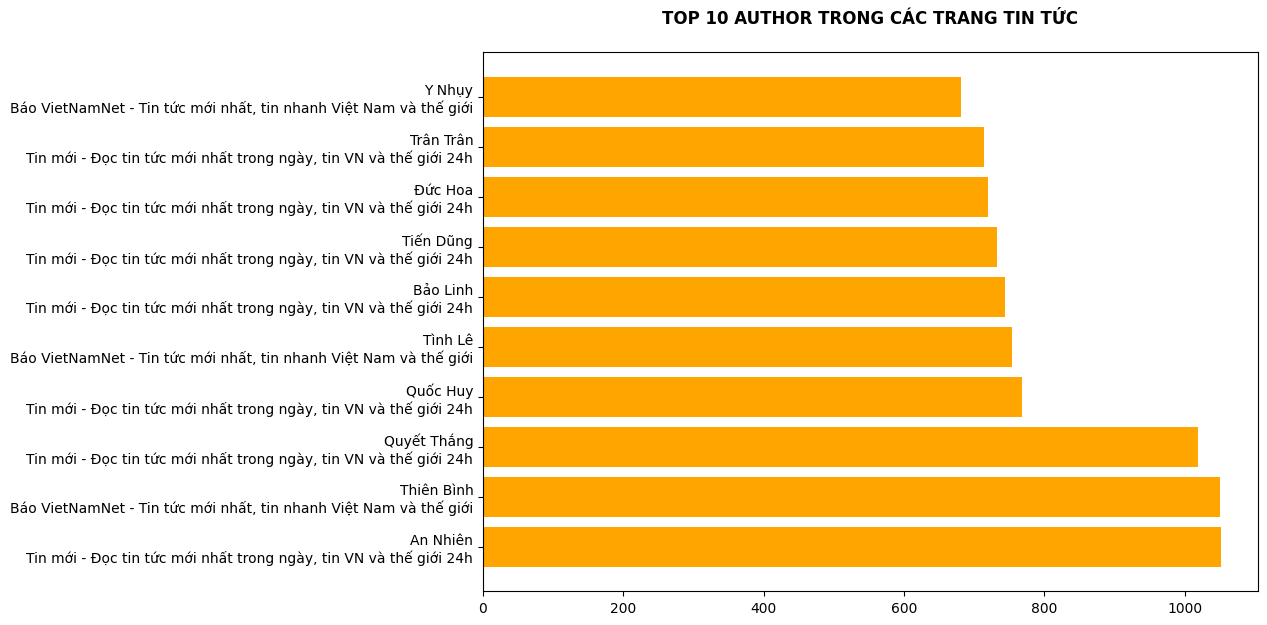

In [26]:
import psycopg2 as p
import psycopg2.extras as pe
import matplotlib.pyplot as plt


hostname = '127.0.0.1'
database = 'news_page_keywords'
username = 'postgres'
password = 'test123456'
port = 5432
conn = None


try:
    with p.connect(host = hostname, dbname = database, user = username, password = password, port = port ) as conn:
        with conn.cursor(cursor_factory = pe.DictCursor) as cur:

            script = '''SELECT author,count(author), nameOfNewsPage FROM news GROUP BY author, nameOfNewsPage ORDER BY count(author) DESC '''
            cur.execute(script)
            result = cur.fetchall()

            author = []
            count = []
            if result:
                for r in result:
                    if r[0] is not None and r[2] is not None:
                        author.append(f"{r[0]}\n{r[2]}") 
                        count.append(r[1])

            
            newAuthor = author[:10]
            newCount = count[:10]
            plt.figure(figsize=(10,7))
            # plt.xticks(rotation=90)
            plt.barh(newAuthor, newCount, color = 'orange')
            plt.title('TOP 10 AUTHOR TRONG CÁC TRANG TIN TỨC\n', fontweight="bold") 
            
            # plt.legend()
            plt.show()
                            
except Exception as error:
    print(error)
finally:
    if conn is not None:
        conn.close()
        
        
            
            
